In [17]:
#import all libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
from pylab import show
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from bokeh.io import output_file,show,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
output_notebook()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings('ignore')

Loading BokehJS ...

In [18]:
# Loading Data
matches = pd.read_csv('U:/aiml ppt/IPL-Prediction-master/IPL-Prediction-master/datasets/matches.csv')
deliveries = pd.read_csv('U:/aiml ppt/IPL-Prediction-master/IPL-Prediction-master/datasets/deliveries.csv')

In [19]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,1,5,5,field,normal,0,1.0,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,2,4,4,field,normal,0,4.0,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,3,6,6,field,normal,0,6.0,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,4,8,8,field,normal,0,8.0,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,5,7,5,bat,normal,0,5.0,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,5/22/2016,7,5,5,field,normal,0,5.0,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,5/24/2016,3,5,5,field,normal,0,5.0,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,5/25/2016,1,6,6,field,normal,0,1.0,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,5/27/2016,3,1,1,field,normal,0,1.0,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [20]:
toss_decision = matches.groupby('toss_decision').count().reset_index()
TossDecision = list(toss_decision['toss_decision'])
TotalWin = list(toss_decision['id'])

p = figure(x_range=TossDecision, title="Bat Or Field After Toss Win",
           toolbar_location=None, tools="")

p.vbar(x=TossDecision, top=TotalWin, width=0.4)
p.xgrid.grid_line_color = None
p.y_range.start = 0
show(p)

In [21]:
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,score,final_score,player_dismissed,dismissal_kind,fielder
0,1,1,1,5,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,171.0,NaN,NaN,NaN
1,1,1,1,5,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,171.0,NaN,NaN,NaN
2,1,1,1,5,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,4,0,4,4,171.0,NaN,NaN,NaN
3,1,1,1,5,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,4,171.0,NaN,NaN,NaN
4,1,1,1,5,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,2,2,6,171.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,5,1,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,2,0,2,194,NaN,NaN,NaN,NaN
150456,636,2,5,1,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,194,NaN,CJ Jordan,run out,NV Ojha
150457,636,2,5,1,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,0,0,1,1,195,NaN,NaN,NaN,NaN
150458,636,2,5,1,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,1,0,1,196,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.show(*args, **kw)>

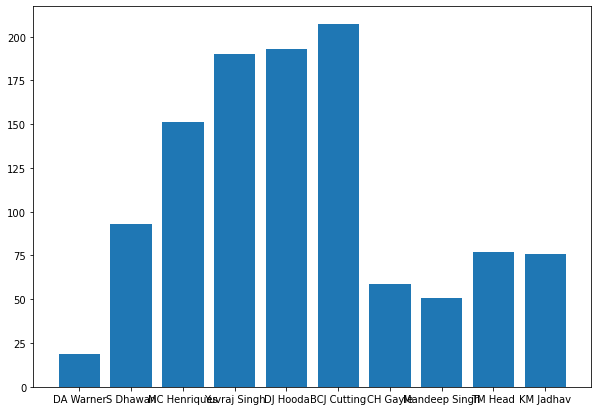

In [22]:
df = pd.DataFrame(deliveries)
bat = df['batsman']
runs = df['score']

fig = mp.figure(figsize=(10,7))
mp.bar(bat[0:180],runs[0:180])
mp.show

In [23]:
batsmen_runs = deliveries.groupby("batsman").sum().sort_values(by = "score", ascending = False)
batsmen_runs = batsmen_runs[["score"]]
batsmen_runs

,score
batsman,
MS Dhoni,294829
RG Sharma,259124
SK Raina,250707
V Kohli,247818
AB de Villiers,201700
...,...
NJ Rimmington,112
MDKJ Perera,108
S Kaushik,104


In [24]:
top_ten_batsmen = batsmen_runs.sort_values("score", ascending = False)[:10]
top_ten_batsmen

,score
batsman,
MS Dhoni,294829
RG Sharma,259124
SK Raina,250707
V Kohli,247818
AB de Villiers,201700
KD Karthik,194170
YK Pathan,187900
Yuvraj Singh,185058
KA Pollard,184151


In [25]:
matches = matches.replace(np.nan, '', regex=True)
deliveries = deliveries.replace(np.nan, '', regex=True)

In [26]:
#Part One - Match Total
from sklearn.preprocessing import LabelEncoder

total_and_balls = pd.DataFrame(deliveries)
#Remove super over deliveries as they are significant in predicting team total
indexNames = total_and_balls[ total_and_balls['is_super_over'] == 1 ].index
total_and_balls.drop(indexNames , inplace=True)

#Encoding text features to numerical values
# creating instance of labelencoder
labelencoder = LabelEncoder()

total_and_balls['batsman'] = labelencoder.fit_transform(total_and_balls['batsman'])
labelencoder.fit_transform(total_and_balls['batsman'])

total_and_balls['bowler'] = labelencoder.fit_transform(total_and_balls['bowler'])
labelencoder.fit_transform(total_and_balls['bowler'])

total_and_balls['non_striker'] = labelencoder.fit_transform(total_and_balls['non_striker'])
labelencoder.fit_transform(total_and_balls['non_striker'])

#Remove less significant attributes
total_and_balls = total_and_balls.drop(['is_super_over', 'wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','batsman_runs','extra_runs','player_dismissed','dismissal_kind','fielder'], axis=1)

#Populate score field
for id in range(1,637):
    df = total_and_balls.loc[total_and_balls['match_id'] == id]
    total_score = df.loc[df.index[-1], "score"]
    total_and_balls.loc[total_and_balls['match_id'] == id, 'final_score']= total_score



In [27]:
total_and_balls.info()
total_and_balls

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150379 entries, 0 to 150459
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   match_id      150379 non-null  int64 
 1   inning        150379 non-null  int64 
 2   batting_team  150379 non-null  int64 
 3   bowling_team  150379 non-null  int64 
 4   over          150379 non-null  int64 
 5   ball          150379 non-null  int64 
 6   batsman       150379 non-null  int32 
 7   non_striker   150379 non-null  int32 
 8   bowler        150379 non-null  int32 
 9   total_runs    150379 non-null  int64 
 10  score         150379 non-null  int64 
 11  final_score   150379 non-null  object
dtypes: int32(3), int64(8), object(1)
memory usage: 13.2+ MB


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,total_runs,score,final_score
0,1,1,1,5,1,1,103,347,331,0,0,171
1,1,1,1,5,1,2,103,347,331,0,0,171
2,1,1,1,5,1,3,103,347,331,4,4,171
3,1,1,1,5,1,4,103,347,331,0,4,171
4,1,1,1,5,1,5,103,347,331,2,6,171
...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,5,1,20,2,399,91,50,2,194,200
150456,636,2,5,1,20,3,399,91,50,0,194,200
150457,636,2,5,1,20,4,160,399,50,1,195,200
150458,636,2,5,1,20,5,399,161,50,1,196,200


In [28]:
total_and_balls.isna().sum()

match_id        0
inning          0
batting_team    0
bowling_team    0
over            0
ball            0
batsman         0
non_striker     0
bowler          0
total_runs      0
score           0
final_score     0
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

X = total_and_balls.values[:,:-1]
y = total_and_balls.values[:,-1]

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [30]:
# Model 1 - Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
#Testing accuracy
lin = model.fit(X_train,y_train)
pred = lin.predict(X_test)
test_acc = r2_score(y_test, pred)
test_acc_mean = mean_squared_error(y_test, pred)
print(f'R square score of the model on test data: {test_acc}')
print(f'Mean squared error of the model on test data: {test_acc_mean}')

R square score of the model on test data: 0.21362725269395433
Mean squared error of the model on test data: 678.5061436770844


In [31]:
#model 2 - K NeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=7, weights='distance', p=2, n_jobs=-1)
knr = knn_model.fit(X_train,y_train)
knr_pred = knr.predict(X_test)
knn_acc = r2_score(y_test, knr_pred)
knn_acc_mean = mean_squared_error(y_test, knr_pred)
print(f'R square score of the model on test data: {knn_acc}')
print(f'Mean squared error of the model on test data: {knn_acc_mean}')

R square score of the model on test data: 0.8614811149420348
Mean squared error of the model on test data: 119.51827533330221


In [32]:
#model3 random forest regressor 
RFR_model = RandomForestRegressor(n_estimators =1000, max_depth=100, random_state=0)
rfr = RFR_model.fit(X_train,y_train)
RFR_pred = rfr.predict(X_test)
RFR_acc = r2_score(y_test, RFR_pred)
RFR_acc_mean = mean_squared_error(y_test, RFR_pred)
print(f'R square score of the model on test data: {RFR_acc}')
print(f'Mean squared error of the model on test data: {RFR_acc_mean}')

R square score of the model on test data: 0.9555941274320972
Mean squared error of the model on test data: 38.31472727899321
